# Week 7: Event-Related Potentials

Congrats on making to week 7 of the workshop! For this week, we're going to learn about event-related potentials, or ERPs.

## What are ERPs?
ERPs are very small voltages generated in the brain in response to specific events. They are thought to be the result of a group of neurons firing in synchrony while your brain is processing information. There are many different types of ERPs, which can be elicited by a wide variety of sensory, motor, or cognitive events.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/ComponentsofERP.svg" alt="ERP Components" style="width: 500px;"/>

## P300
One of the most researched ERPs is the P300 wave. The P300 wave can be triggered by something called the "oddball" paradigm, where a series of events or stimuli are presented.

![Sequence of Events](sequence_of_events.png)

The sequence of events consists of some common events (the apple):
![Common Event](common_events.png)

... as well as some rare but more relevant events (the orange) - which we call the oddball:
![Rare Event](rare_events.png)

When your brain perceives the rare event, it generates an "ah-ha" activity. This "ah-ha" activity looks like a **p**ositive deflection in the EEG signal around **300** milliseconds after the onset of the event or stimulus, which is how the P300 wave got its name.

<img src="https://www.researchgate.net/publication/350863087/figure/fig1/AS:1019751522369542@1620139117988/Determination-of-P300-through-event-related-potential-ERP-for-evaluating-concentration.png" alt="P300 Wave" style="width: 500px;"/>

### P300 Speller
The P300 wave is a pretty useful ERP, because we can use it for brain-computer interfaces! For example, one application of the P300 wave is the P300 speller. The P300 speller is an interface that allows people to communicate by spelling words using only their brain activity. Since a P300 wave can be triggered by a visual stimulus, the idea is to present a grid of letters that are flashing in a random pattern. To select a letter, the person would focus their attention on the desired letter and ignore other letters.

![P300 Speller](https://thumbs.gfycat.com/AmusedDeficientIriomotecat-size_restricted.gif)

Recall our apples and oranges analogy. In this setup, flashing of the desired key is the rare but relevant event (the orange), while flashing of all the other keys are the common events (the apple). When the person sees their desired letter being flashed, their brain automatically generates the P300 "ah-ha" activity. Over time, we can detect the P300 activity, and identify the letter the person is looking at!

### A Small Exercise
In the P300 speller example above, we see that one row or column is being flashed at a time. This is useful because flashing multiple letters at the same time is much faster than flashing each letter one at a time! However, this also means that we can't identify the letter someone is looking at based on one flash alone.

In this example, let's play detective! Your job is to figure out the the letter the person is trying to select based on the sequence of flashes. In the picture below, the group of letters represents the row or column being flashed, and the apple or orange above respresents whether a P300 was detected or not for that group of letters. Based on this information, can you piece together which letter is the target letter?

![P300 Exercise](p300_exercise.png)

<details>

<summary><b>Click on me to see the correct answer</b></summary>

The target letter is "U". Why is that you ask? That's because the P300 (indicated by the orange) is triggered when column "CIOU17" and row "STDVWX" are flashed. That means column "CIOU17" and row "STDVWX" both consist of our target letter. All we have to do is to find the common letter in these groups, and we can figure out the target letter is "U"!

</details>

## Processing ERPs

Now that we understand what ERPs are, let's try to process and plot them!

First, you will need to install [MNE](https://mne.tools/stable/install/index.html). MNE is an open-source Python package for analyzing EEG data. If you are using pip, you can install the package with the command: `pip install mne`. We'll use MNE to load some sample ERP data and visualize it.

To start off, let's load a sample dataset from MNE in which the subject performs a bunch of different tasks. We'll also load in the events so we know what these tasks are and when they happened. The original raw data is ~4.5 minutes long but we don't really need all of that, so let's just crop it down to 90 seconds.

In [1]:
%matplotlib qt

In [2]:
# import some packages
import mne, os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load sample EEG data (downloaded automatically if you don't already have it)
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')
print(sample_data_raw_file)
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

# load events
sample_data_events_file = os.path.join(sample_data_folder, 'MEG', 'sample','sample_audvis_filt-0-40_raw-eve.fif')
events = mne.read_events(sample_data_events_file)
event_dict = {'auditory/left': 1, 'auditory/right': 2,
              'visual/left': 3, 'visual/right': 4,
              'face': 5, 'buttonpress': 32}

# crop data
raw.crop(tmax=90)
events = events[events[:, 0] <= raw.last_samp]

# Add annotations to EEG data
onset = events[:,0] / raw.info['sfreq']
duration = events[:,1]
description = [list(event_dict.keys())[list(event_dict.values()).index(e)] for e in events[:,2]]
annotations = mne.Annotations(onset, duration, description)
raw.set_annotations(annotations)

C:\Users\Jason\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif
Opening raw data file C:\Users\Jason\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


C:\Users\Jason\AppData\Local\Temp\ipykernel_5276\2047398820.py:23: RuntimeWarning: Omitted 65 annotation(s) that were outside data range.
  raw.set_annotations(annotations)


<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 13515 (90.0 s), ~42.0 MB, data loaded>

It's always good to get to know your data. In the code above, we've used the `mne.io.read_raw_fif()` function to load our data into a `Raw` object in MNE. This `Raw` data structure stores all the EEG data as well as other important parameters. Let's print them out and have a look ourselves.

In [4]:
# print Raw info
raw

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 13515 (90.0 s), ~42.0 MB, data loaded>

As you can see, the `Raw` data structure gives us a lot of information about the data. For example, we can see that the data is made up of 90 seconds of EEG data. We can also tell that it has 60 EEG channels and is sampled at 150 Hz. The data also seems to be already filtered between 0.1 to 40 Hz. That's good, because EEG is typically contaminated by electrical line noise (around 60 Hz in Canada). Since we already filtered the data, it should have less artifacts and look cleaner.

Next up, let's try to plot the location of the sensors by using MNE's `plot_sensor()` function.

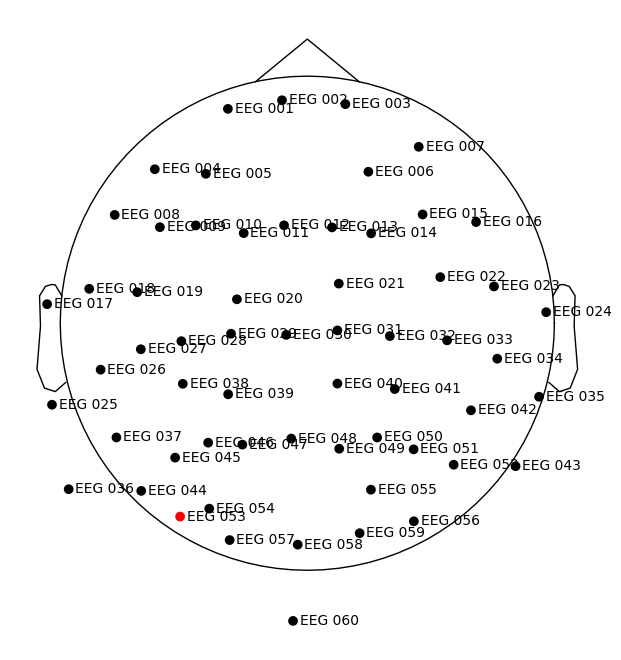

In [5]:
# Plot channel locations
raw.plot_sensors(ch_type='eeg', show_names=True)

Cool, now not only do we know we have 60 EEG channels, we can also see where these channels are located.

Let's move on and plot the EEG data using the `plot()` function built into the `Raw` object and see what it looks like!

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Using matplotlib as 2D backend.
Opening raw-browser...


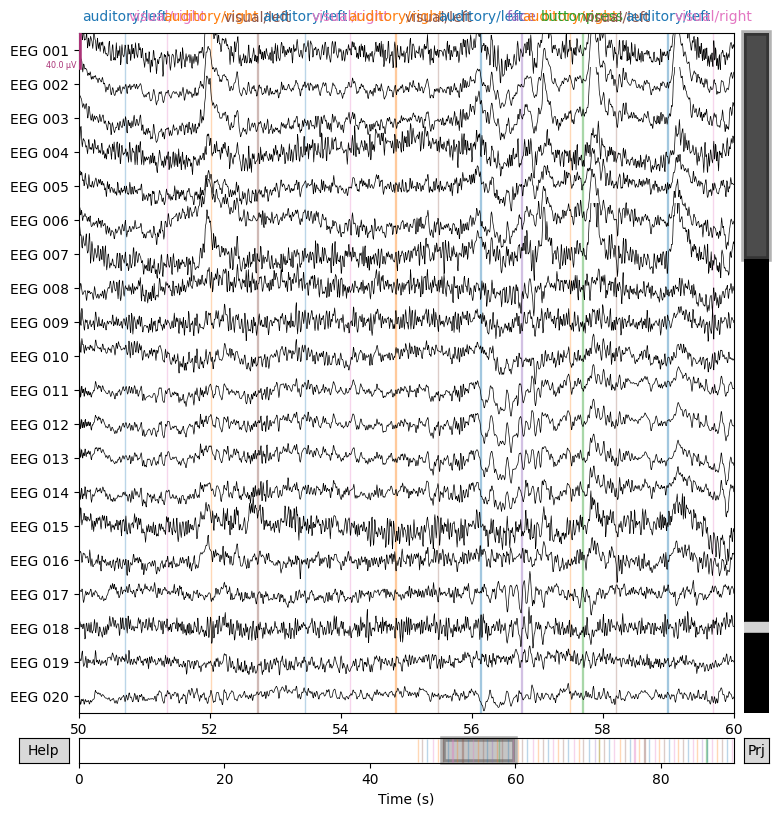

In [6]:
# Plot data
raw.pick('eeg').plot(start=50)

This plot shows us the continuous EEG timeseries signal being plotted for each channel, with the events being annotated as vertical markers. The cool thing about this plot is that it is interactive! You can press the left or right arrow key to scroll forward and backwards in time, and the up or down arrow key to scroll between channels. For more keyboard shortcuts, click on the "Help" button at the bottom-left of the figure.

From the plot, we can see that there are multiple events this EEG recording. There are auditory and visual tasks, which suggest some kind of audio or visual stimuli were presented to the subject. For each of these tasks, it also seems to be separated into the left or right side, meaning the stimuli was probably presented on one side of the participant. Having all of these annotations help us epoch or segment the data into different sections.

Let's try that ourselves! Here, we'll segmenting or "epoch" our data into sections centered around the events. For this example, let's create our epochs starting from 0.3 seconds before the onset of the events until 0.7 seconds after the onset. MNE provides the `Epochs` data structure to conveniently do this for us.

In [7]:
# Epoch the data
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.3, tmax=0.7, preload=True)

Not setting metadata
132 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 132 events and 151 original time points ...
1 bad epochs dropped


That was easy! Now, let's visualize these epochs by plotting them. Instead of plotting the EEG voltage as a line graph on the y-axis, let's try to plot it as a color map image instead, where a higher voltage gives us a darker colour and a lower voltage gives us a lighter colour. For this example, let's just look at the visual epochs.

In [8]:
# Plot visual epochs as an image
epochs['visual'].plot_image(show=True)

Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


[<Figure size 640x480 with 3 Axes>]

From the plot, we see the ERP image on the top, and the ERP or evoked response at the bottom. The ERP image shows the overall ERP across all channels for each epoch, while the evoked response plot shows the ERP across all channels and all epochs (with the standard deviation across epochs highlighted in gray). Both of these plots are really helpful in visualizing epoched EEG data.

Because we're learning about ERPs in this lesson, I want to bring your attention to something in the EEG plot. Can you visually see any changes in the signal (i.e. a vertical band in the ERP image or a peak in the ERP plot) when the events happen? If the annotation (the dotted black line) was not there, do you think you can tell where these events happened just from looking at the EEG data?

Probably not. And that's because the ERP image we plotted is averaging over all the channels - but the ERP might not be generated over the entire brain so some channels might not be as important as others. If we just take the average across all the channels, our actual signal can be "diluted" with the unimportant channels, so we don't really see any time-locked response. Given that visual stimuli is often processed in the back part of the brain, let's try to plot this again with a single channel near the back of the head.

In [9]:
# Plot visual epochs as an image for channel 58
epochs['visual'].plot_image(picks=['EEG 058'], show=True)

Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 640x480 with 4 Axes>]

From this plot, we can we can see the ERP more clearly. From the image, we see that many trials seem to have a blue band around 0.2 seconds, and a red band around 0.25 seconds. When we look at the ERP plot on the bottom, we see a trough and peak at the corresponding times in the voltage plot. This is mostly likely a P300 ERP elicited from a visual stimulus!

## Evoked Response

Remember how ERPs are "**very small** voltages generated in the brain"? They can actually be so small that it's hard to see when you're just looking at a single instance of data. So how can we tell that ERPs exist?

It's difficult to see ERPs because these tiny signals tend to be drowned out by noise. But what if we can reduce the noise so we can see the actual signal better? That's the intuition behind epoch averaging - by averaging multiple trials together, we can cancel out the noise so we can see the ERP signal better.

Let's have you try to do that as an exercise! To get you started, here is some code to extract the data as a numpy array. The array has dimensions: number of trials x number of channels x number of time samples. Your job is to average the epochs over all trials and plot the resulting ERP for each channel. Make sure to label your x and y axes, and add a label for the channels!

In [10]:
# Extract visual data
visual_data = epochs['visual'].get_data() * 1e6
print("Shape of data array: ", visual_data.shape)

# Get times for x-axis and channel names for legend
times = np.arange(-0.3, 0.7, 1 / raw.info['sfreq'])
ch_names = raw.info['ch_names']

# TODO: average data over all trials
visual_data_avg = np.mean(visual_data, axis=0)
visual_data_avg.shape

# TODO: plot averaged trials for each channel
plt.close('all')
plt.figure()
for i in range(visual_data_avg.shape[0]):
    plt.plot(times, visual_data_avg[i,:], label=ch_names[i])
plt.xlabel('Time (Seconds)')
plt.ylabel('Voltage (uV)')
plt.title('Averaged ERP Response for Each Channel for Visual Task')
plt.legend()
plt.show()

Shape of data array:  (58, 60, 151)
Closing raw-browser...
Channels marked as bad:
['EEG 053']


Alright, hopefully you've got a chance to try plotting the ERPs yourself! While that was a good coding exercise, MNE actually offers some convenient functions to visualize these ERPs. For example, let's compute the averaged response for all visual trials and plot the result.

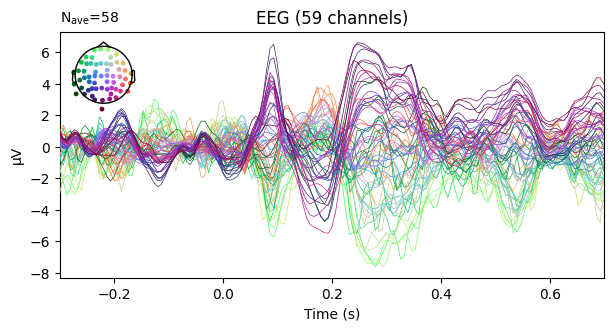

In [11]:
# Plot averaged visual ERP response
vis_avg = epochs['visual'].average()
vis_avg.plot(spatial_colors=True)

Pretty cool isn't it? Let's also try to plot the averaged response for the auditory tasks and see if they look any different!

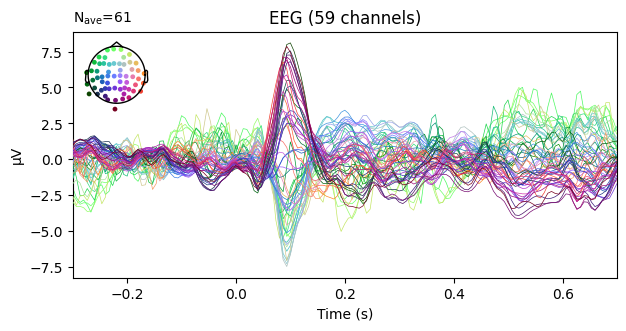

In [12]:
# Plot averaged auditory ERP response
aud_avg = epochs['auditory'].average()
aud_avg.plot(spatial_colors=True)

From these ERP plots, we can see that both of the visual and auditory tasks seem to trigger a pretty significant ERP response of more than 5 microvolts. While the ERP for both the auditory and visual tasks seems to have a peak around 0.1 seconds, the visual ERP seems to have another peak around 0.25 seconds. To compare these, lets pick several channels and plot the averaged response for them.

In [13]:
# Comapre visual and auditory averaged response
evokeds = dict(vis=vis_avg, aud=aud_avg)
picks = ['EEG 044', 'EEG 045', 'EEG 046', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 059']
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine='mean')

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


[<Figure size 800x600 with 1 Axes>]

In [14]:
# close the plots
plt.close('all')

## Classification of EEG data

To end off this lesson, let's try to apply our machine learning skils and write a simple classifier to distinguish between visual and auditory tasks from our EEG data! Feel free to use Python's machine learning package, `sklearn`, which provides a lot of built-in tools for classifying data!

To get you started, I'll extract the auditory and visual EEG data for you. Here `X` is our EEG data, and `y` is our labels. `X` is a numpy array with dimensions (num trials, num channels, num time samples). `y` is a numpy array with size equal to the number of trials. Auditory trials are labelled as 0 and visual trials are labelled as 1. 

In [15]:
# Extract auditory and visual data
task_indices = [i for i in range(len(epochs.events[:,-1])) if epochs.events[:,-1][i] in [1,2,3,4]]
X = epochs.get_data()[task_indices, :, :]
y = epochs.events[task_indices,-1]
y = np.array([0 if label in [1, 2] else 1 for label in y])
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (119, 60, 151)
y.shape:  (119,)


Now, your task is to write a classifier to classify between visual and auditory tasks. Evaluate the performance of your classifier using 5-fold cross validation, and print the mean score over all folds.

Hint: You may want to reshape your data from 3 dimensions to 2 for standard classifiers to work.

In [16]:
# TODO: Write a classifier to classify between visual and auditory tasks
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

X_flatten = X.reshape(X.shape[0], -1)

clf = LinearDiscriminantAnalysis()
score = cross_val_score(clf, X_flatten, y, cv=5, scoring='roc_auc')
print("Mean Classification Score: %0.2f%%" %  (np.mean(score) * 100))

Mean Classification Score: 91.01%
